# Identify Customer Churn with Machine Learning

Created by : Wahyu Eki Sepriansyah

**Context :**

Sebuah perusahaan e-commerce menghadapi tantangan umum dalam industri, yaitu customer churn atau pelanggan yang berhenti menggunakan layanan. Kehilangan pelanggan yang sudah ada jauh lebih merugikan daripada biaya untuk mengakuisisi pelanggan baru. Perusahaan memiliki data historis yang mencakup demografi pelanggan (seperti status pernikahan), perilaku transaksi (seperti kategori pesanan favorit dan jumlah cashback), serta interaksi dengan layanan (seperti lama berlangganan/tenure dan jumlah keluhan).

Konteks analisis ini adalah memanfaatkan data tersebut untuk membangun model prediktif yang dapat mengidentifikasi pelanggan yang paling berisiko untuk berhenti berlangganan. Dengan pemahaman ini, perusahaan dapat merancang strategi retensi yang lebih efektif dan personal.
Target :     

0 : Tidak Churn

1 : Churn


**Problem Statement :**    

Perusahaan e-commerce ini mengalami tingkat customer churn yang berdampak pada penurunan pendapatan dan peningkatan biaya akuisisi pelanggan. Saat ini, perusahaan belum memiliki metode sistematis untuk mengidentifikasi pelanggan yang berisiko churn secara dini. Akibatnya, upaya retensi pelanggan seringkali tidak tepat sasaran, bersifat reaktif, atau bahkan terlambat dilakukan, sehingga sumber daya pemasaran tidak digunakan secara efisien.

Masalah utamanya adalah: Bagaimana cara membangun sebuah model machine learning yang akurat untuk memprediksi pelanggan mana yang akan churn berdasarkan data perilaku dan transaksi mereka, sehingga tindakan retensi dapat dilakukan secara proaktif?

**Goals :**

Berdasarkan pernyataan masalah, tujuan dari proyek analisis ini dapat dibagi menjadi dua kategori:

**Tujuan Bisnis:**

- Mengurangi tingkat churn secara keseluruhan dengan intervensi yang tepat waktu.

- Meningkatkan efektivitas kampanye retensi dengan menargetkan pelanggan yang paling berisiko.

- Mengoptimalkan alokasi anggaran dan sumber daya untuk program loyalitas atau penawaran khusus kepada pelanggan yang teridentifikasi berisiko churn.

**Tujuan Analitis:**

- Membangun model klasifikasi untuk memprediksi probabilitas churn dari setiap pelanggan dengan performa terbaik.

- Mengidentifikasi faktor-faktor utama (fitur) yang paling berpengaruh terhadap keputusan pelanggan untuk churn.

- Menentukan metrik evaluasi yang paling sesuai untuk mengukur keberhasilan model dalam konteks bisnis (yaitu, meminimalkan jumlah pelanggan churn yang terlewatkan oleh prediksi).

**Analystic Approach**

Jadi langkah awal yang akan dilakukan adalah menganalisis data untuk mencari pola customer yang berpotensi churn.

Kemudian dengan data tersebut akan digunakan untuk membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas apakah customer berpotensi churn

**Metric Evaluation**

Type 1 error : False Positive

**Skenario:** Model memprediksi seorang pelanggan akan churn, padahal sebenarnya pelanggan tersebut tidak akan churn (tetap setia).

**Konsekuensi**: Perusahaan akan mengeluarkan biaya dan sumber daya untuk melakukan tindakan retensi (misalnya, memberikan diskon khusus, bonus, atau penawaran eksklusif) kepada pelanggan yang sebenarnya loyal dan tidak berniat untuk pergi. Konsekuensinya adalah inefisiensi biaya pemasaran dan potensi penurunan margin keuntungan karena memberikan insentif yang tidak perlu.

Type 2 error : False Negative

**Skenario:** Model memprediksi seorang pelanggan akan tetap setia, padahal sebenarnya pelanggan tersebut akan churn.

**Konsekuensi:** Perusahaan tidak melakukan tindakan retensi apa pun terhadap pelanggan yang berisiko tinggi ini. Akibatnya, perusahaan kehilangan pelanggan tersebut beserta seluruh potensi pendapatan di masa depan (Customer Lifetime Value). Ini adalah kerugian pendapatan secara langsung dan merupakan opportunity cost yang sangat tinggi.





#Lad Data dan Import Library


In [40]:
# Analisis & Visualisasi Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Preprocessing & Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.base import clone

# Model / Algoritma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost import XGBClassifier

# Evaluasi Metrik
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Penanganan Data Tidak Seimbang (Resampling)
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Pencarian Hyperparameter
from sklearn.model_selection import RandomizedSearchCV

# 2. Data Understanding

In [41]:
#Load dataset
df = pd.read_csv("/content/data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [43]:
#rows and columns
df.shape

(3941, 11)

In [44]:
#Statistik Deskriptif
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


# 3. Data Cleaning
Duplicate

In [45]:
#Duplicat check
duplicate = df[df.duplicated()]
if duplicate.empty:
    print("There are no duplicates")
else:
    print(f"Number of duplicated rows: {df.duplicated().sum()}")

duplicate.sort_values(by=df.columns.tolist()).head()

Number of duplicated rows: 671


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3576,0.0,6.0,3,Laptop & Accessory,4,Married,2,0,4.0,163.97,0
575,0.0,6.0,3,Mobile,4,Single,2,1,4.0,132.02,1
2821,0.0,6.0,4,Mobile,4,Single,2,0,0.0,128.36,0
3333,0.0,6.0,4,Mobile Phone,3,Single,1,1,2.0,137.30,1
1696,0.0,8.0,1,Laptop & Accessory,3,Married,2,0,7.0,152.06,0


#Missing value

In [46]:
df.isna().sum()

,0
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,213
CashbackAmount,0


In [47]:
df.isna().sum()*100/df.shape[0]

,0
Tenure,4.922608
WarehouseToHome,4.288252
NumberOfDeviceRegistered,0.000000
PreferedOrderCat,0.000000
SatisfactionScore,0.000000
MaritalStatus,0.000000
NumberOfAddress,0.000000
Complain,0.000000
DaySinceLastOrder,5.404720
CashbackAmount,0.000000


In [48]:
# missing values check
missing_value_check = pd.DataFrame({
    "type": df.dtypes.values,
    "total": [df.shape[0]] * len(df.columns),
    "null_count": df.isna().sum().values,
    "null_pct": (df.isna().sum() / df.shape[0] * 100).round(2).values,
    "unique_count": df.nunique().values,
    "unique_sample": [df[col].unique()[:5] for col in df.columns],
}, index=df.columns).rename_axis('column')
missing_value_check

,type,total,null_count,null_pct,unique_count,unique_sample
column,,,,,,
Tenure,float64,3941,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0]"
WarehouseToHome,float64,3941,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0]"
NumberOfDeviceRegistered,int64,3941,0,0.00,6,"[4, 3, 6, 2, 5]"
PreferedOrderCat,object,3941,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
SatisfactionScore,int64,3941,0,0.00,5,"[3, 1, 4, 2, 5]"
MaritalStatus,object,3941,0,0.00,3,"[Single, Married, Divorced]"
NumberOfAddress,int64,3941,0,0.00,14,"[2, 5, 7, 8, 3]"
Complain,int64,3941,0,0.00,2,"[0, 1]"
DaySinceLastOrder,float64,3941,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0]"


<Axes: >

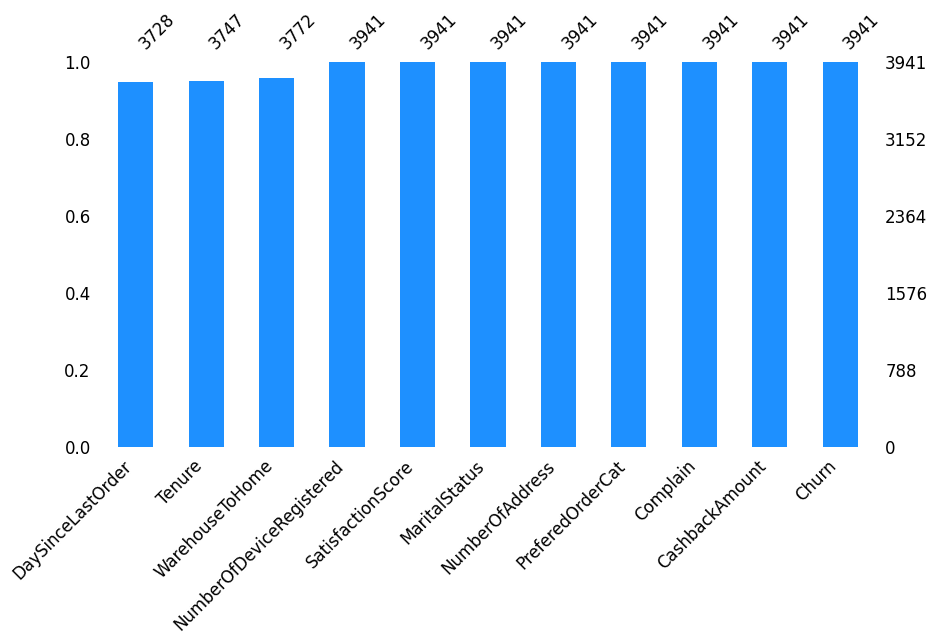

In [49]:
# missing value chek by missingno
msno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [50]:
# Cek dan hapus data duplikat jika ada
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"\n{df.duplicated().sum()} baris duplikat telah dihapus.")
else:
    print("\nTidak ada data duplikat ditemukan.")


0 baris duplikat telah dihapus.


In [51]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [52]:
df.isna().sum()

,0
Tenure,0
WarehouseToHome,0
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,0
CashbackAmount,0


- Pada handling missing value secara spesifik saya memilih median (nilai tengah) daripada rata-rata (mean) karena lebih tahan terhadap outlier (nilai ekstrem). Jika ada beberapa pelanggan dengan Tenure atau WarehouseToHome yang sangat tinggi, nilai rata-rata bisa tertarik ke atas dan tidak lagi mewakili "nilai tipikal" dari data tersebut. Median akan memberikan representasi yang lebih stabil.

- Kenapa tidak drop padahal missing value dibawah 6% disetiap kolom missing value karena dikhawatirkan akan membuat model lebih sedikit contoh untuk dipelajari yang dapat membuat model kurang akurat karena keseluruhan missing value 14,62%

- Data yang hilang tidak terjadi secara acak. Kemungkinan pelanggan baru(dengan `Tenure` rendah) cenderung tidak mengisi beberapa data. Jika menghapus semua baris, nantinya dikhawatirkan model tidak akan belajar dengan baik tentang pola perilaku pelanggan baru, sehingga peformanya menjadi bias dan tidak akurat untuk segmen pelangan.

# Analisis Data Eksploratif (EDA)

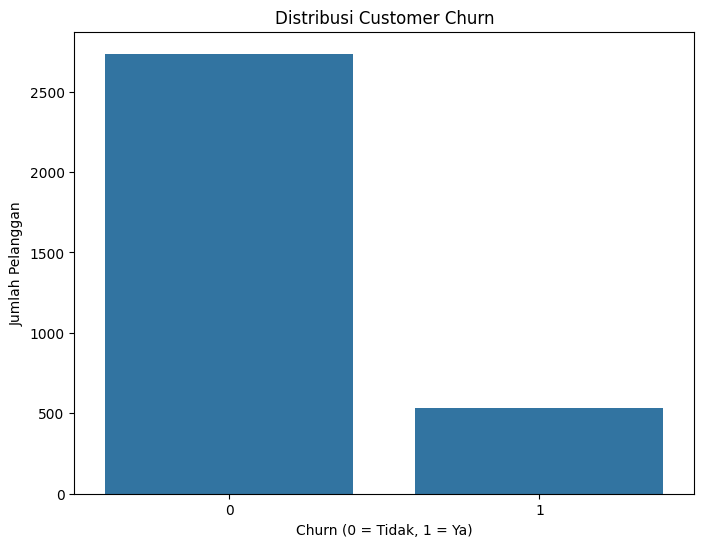

In [53]:
# Distribusi Target
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Customer Churn')
plt.xlabel('Churn (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

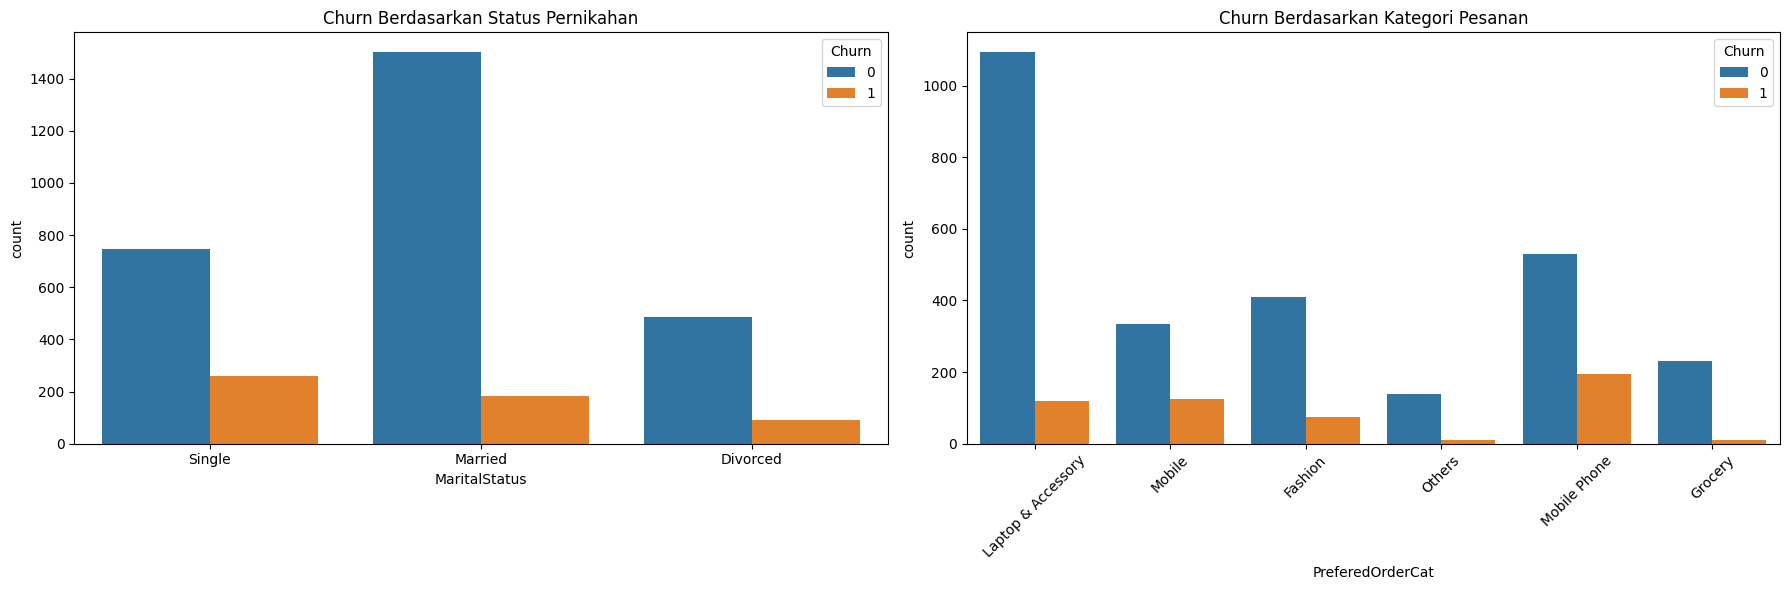

In [54]:
# Analisis Fitur Kategorikal vs Churn
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(ax=axes[0], x='MaritalStatus', hue='Churn', data=df).set_title('Churn Berdasarkan Status Pernikahan')
sns.countplot(ax=axes[1], x='PreferedOrderCat', hue='Churn', data=df).set_title('Churn Berdasarkan Kategori Pesanan')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


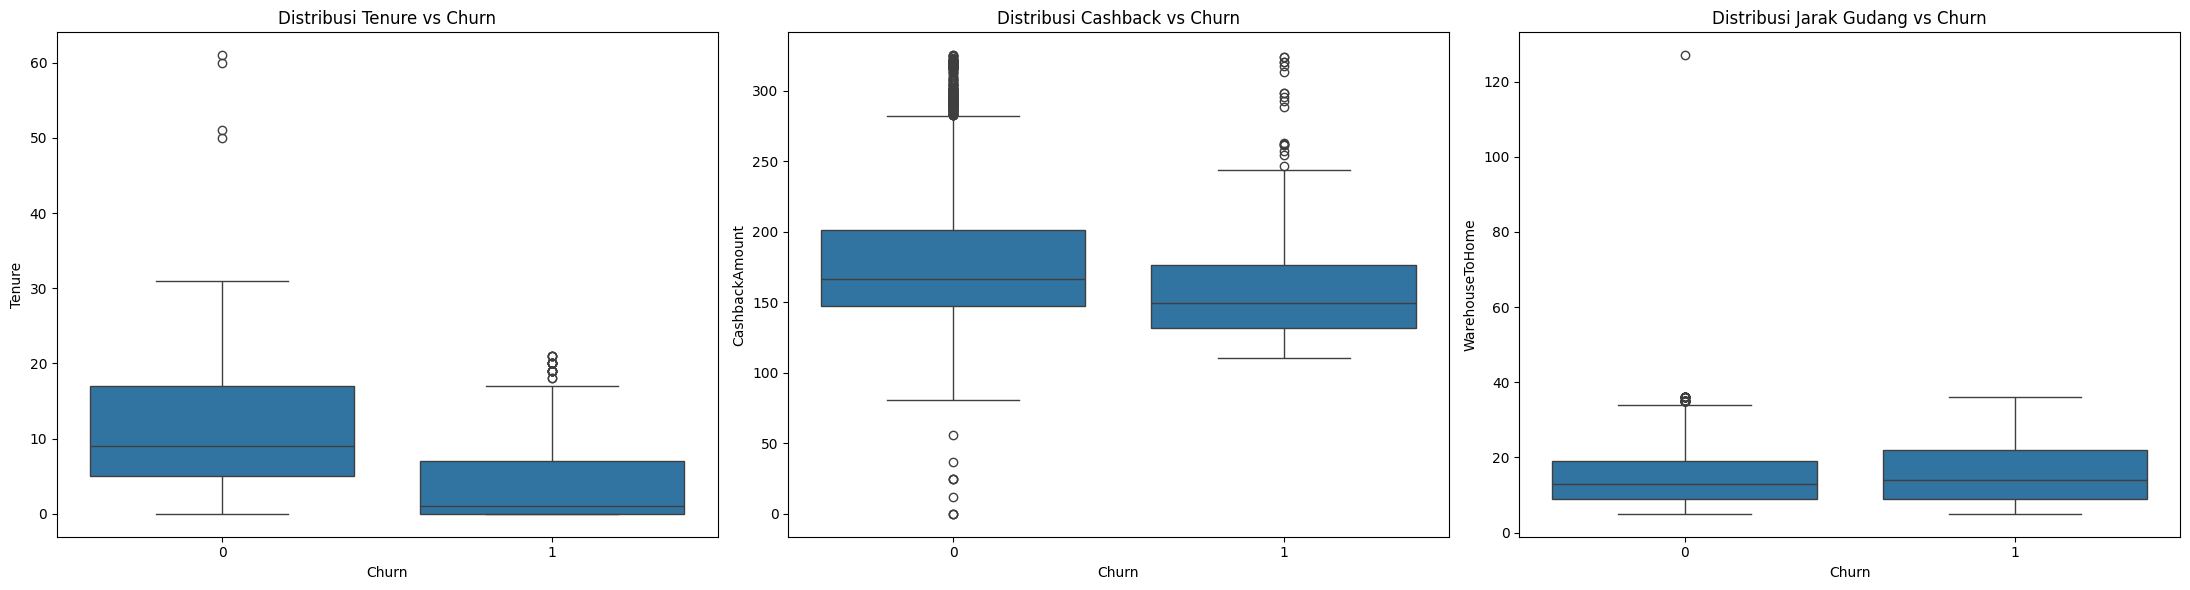

In [55]:
# Analisis Fitur Numerik vs Churn
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
sns.boxplot(ax=axes[0], x='Churn', y='Tenure', data=df).set_title('Distribusi Tenure vs Churn')
sns.boxplot(ax=axes[1], x='Churn', y='CashbackAmount', data=df).set_title('Distribusi Cashback vs Churn')
sns.boxplot(ax=axes[2], x='Churn', y='WarehouseToHome', data=df).set_title('Distribusi Jarak Gudang vs Churn') # <-- Plot baru ditambahkan
plt.tight_layout()
plt.show()

# Data Preparation

In [56]:
X = df.drop(columns='Churn')
y = df['Churn']


In [57]:
num_cols = [
    "Tenure", "WarehouseToHome", "NumberOfDeviceRegistered",
    "SatisfactionScore", "NumberOfAddress", "DaySinceLastOrder", "CashbackAmount"
]
bin_cols = ["Complain"]
cat_cols = ["PreferedOrderCat", "MaritalStatus"]


In [58]:
preprocess_transformer= ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("bin", "passthrough", bin_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [60]:
X_train_prep = preprocess_transformer.fit_transform(X_train)
X_test_prep = preprocess_transformer.transform(X_test)

print(X_train_prep.shape, X_test_prep.shape)

(2616, 17) (654, 17)


#Model Selection

In [61]:
list_model = [
    LogisticRegression(random_state=0, max_iter=500),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=0),
    BaggingClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0),
    XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
]

In [62]:
results = []
for estimator in list_model:
    name = estimator.__class__.__name__
    pipe = Pipeline([
        ('preproc', preprocess_transformer),
        ('clf', clone(estimator))
    ])
    try:
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
    except Exception as e:
        print(f"[ERROR] Gagal train/predict untuk {name}: {e}")
        continue

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))

    results.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1})

results_df = pd.DataFrame(results).set_index('Model').sort_values(by='Recall', ascending=False)

pd.DataFrame(results).set_index('Model').sort_values(by='Recall', ascending=False)


=== LogisticRegression ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       547
           1       0.74      0.55      0.63       107

    accuracy                           0.89       654
   macro avg       0.83      0.76      0.78       654
weighted avg       0.89      0.89      0.89       654


=== KNeighborsClassifier ===
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       547
           1       0.77      0.43      0.55       107

    accuracy                           0.89       654
   macro avg       0.83      0.70      0.74       654
weighted avg       0.88      0.89      0.87       654


=== DecisionTreeClassifier ===
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       547
           1       0.59      0.68      0.63       107

    accuracy                           0.87       654
   macro avg       0.76      0.80     

,Accuracy,Precision,Recall,F1
Model,,,,
XGBClassifier,0.926606,0.786408,0.757009,0.771429
DecisionTreeClassifier,0.871560,0.593496,0.682243,0.634783
RandomForestClassifier,0.917431,0.791209,0.672897,0.727273
BaggingClassifier,0.911315,0.757895,0.672897,0.712871
GradientBoostingClassifier,0.909786,0.760870,0.654206,0.703518
AdaBoostClassifier,0.899083,0.730337,0.607477,0.663265
LogisticRegression,0.894495,0.737500,0.551402,0.631016
KNeighborsClassifier,0.885321,0.766667,0.429907,0.550898


Model terbaik: XGBoost → karena punya kombinasi terbaik Accuracy, Recall, dan F1-score.
- Accuracy: 92.66% (tertinggi)
- Recall: 75.70% (paling tinggi juga → bagus untuk deteksi churn)
- F1: 0.77 (tertinggi → balance precision & recall)

XGBoost paling seimbang dan cocok untuk kasus churn detection (karena recall penting supaya tidak salah melewatkan customer yang churn).

Test Oversampling with K-fold Cross Validation

In [63]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss = NearMiss()

In [64]:
pipe_model = Pipeline([
    ("preprocessing", preprocess_transformer),
    ("resampling", None),
    ("rfe_xgb", RFE(estimator=XGBClassifier(random_state=0)))
])
pipe_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('bin', 'passthrough',
                                                  ['Complain']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('resam...
                                             feature_weights=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None, ...)))])

In [65]:
hyperparam = {
    "rfe_xgb__estimator__n_estimators": [50, 100, 200, 300, 400, 500],
    "rfe_xgb__estimator__max_depth": [3, 4, 5, 6, 8],
    "rfe_xgb__estimator__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "rfe_xgb__estimator__subsample": [0.6, 0.8, 1.0],
    "rfe_xgb__estimator__colsample_bytree": [0.6, 0.8, 1.0]
}


In [66]:
randomsearch = RandomizedSearchCV(
    estimator=pipe_model,
    random_state=0,
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
    param_distributions=hyperparam,
    verbose=1
)

randomsearch

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceLastOrder',
                                                                                'CashbackAmount']),
                                                                              ('bin',
                                                                               'passthrough',
                                                                               ['Complain']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['PreferedOrde...
                                                                          num_parallel_tree=None, ...)))]),
                   n_jobs=-1,
                   param_distributions={'rfe_xgb__estimator__colsample_bytree': [0.6,
                                                                                 0.8,
                                                                                 1.0],
                                        'rfe_xgb__estimator__learning_rate': [0.01,
                                                                              0.05,
                                                                              0.1,
                                                                              0.2],
                                        'rfe_xgb__estimator__max_depth': [3, 4,
                                                                          5, 6,
                                                                          8],
                                        'rfe_xgb__estimator__n_estimators': [50,
                                                                             100,
                                                                             200,
                                                                             300,
                                                                             400,
                                                                             500],
                                        'rfe_xgb__estimator__subsample': [0.6,
                                                                          0.8,
                                                                          1.0]},
                   random_state=0, scoring='roc_auc', verbose=1)

In [67]:
randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceLastOrder',
                                                                                'CashbackAmount']),
                                                                              ('bin',
                                                                               'passthrough',
                                                                               ['Complain']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['PreferedOrde...
                                                                          num_parallel_tree=None, ...)))]),
                   n_jobs=-1,
                   param_distributions={'rfe_xgb__estimator__colsample_bytree': [0.6,
                                                                                 0.8,
                                                                                 1.0],
                                        'rfe_xgb__estimator__learning_rate': [0.01,
                                                                              0.05,
                                                                              0.1,
                                                                              0.2],
                                        'rfe_xgb__estimator__max_depth': [3, 4,
                                                                          5, 6,
                                                                          8],
                                        'rfe_xgb__estimator__n_estimators': [50,
                                                                             100,
                                                                             200,
                                                                             300,
                                                                             400,
                                                                             500],
                                        'rfe_xgb__estimator__subsample': [0.6,
                                                                          0.8,
                                                                          1.0]},
                   random_state=0, scoring='roc_auc', verbose=1)

In [68]:
randomsearch.best_params_

{'rfe_xgb__estimator__subsample': 0.6,
 'rfe_xgb__estimator__n_estimators': 50,
 'rfe_xgb__estimator__max_depth': 6,
 'rfe_xgb__estimator__learning_rate': 0.2,
 'rfe_xgb__estimator__colsample_bytree': 0.8}

In [69]:
randomsearch.best_score_

np.float64(0.9127218497439632)

In [70]:
randomsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('bin', 'passthrough',
                                                  ['Complain']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('resam...
                                             feature_weights=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.2, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None, max_depth=6,
                                             max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=50, n_jobs=None,
                                             num_parallel_tree=None, ...)))])

In [71]:
best_model = randomsearch.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('bin', 'passthrough',
                                                  ['Complain']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('resam...
                                             feature_weights=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.2, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None, max_depth=6,
                                             max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=50, n_jobs=None,
                                             num_parallel_tree=None, ...)))])

In [72]:
estimator=Pipeline([
    ("preprocessing", preprocess_transformer),
    ("resampling", None),
    ("rfe_xgb", RFE(estimator=XGBClassifier(random_state=0)))
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('bin', 'passthrough',
                                                  ['Complain']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('resam...
                                             feature_weights=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None, ...)))])

In [73]:
# Default model
y_pred_proba_default = estimator.predict_proba(X_test)[:, 1]

# Tuned model
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Hitung ROC AUC
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"ROC AUC Default: {roc_auc_default:.4f}")
print(f"ROC AUC Tuned: {roc_auc_tuned:.4f}")



ROC AUC Default: 0.9500
ROC AUC Tuned: 0.9498


Hasil evaluasi dengan metrik ROC-AUC menunjukkan:

- Model default: ROC-AUC = 0.9500
- Model tuned: ROC-AUC = 0.9498

Nilai keduanya hampir identik dan sama-sama sangat tinggi (mendekati 1.0). Artinya, baik model default maupun model hasil hyperparameter tuning sudah memiliki kemampuan yang sangat baik dalam membedakan customer churn vs non-churn.

Perbedaan skor yang sangat kecil (0.0002) menunjukkan bahwa tuning parameter pada kasus ini tidak memberikan peningkatan signifikan terhadap kualitas model. Dengan kata lain, model default sudah cukup optimal dalam mendeteksi pola churn.

Hal ini penting karena pada data dengan distribusi imbalanced (87% non-churn vs 13% churn), mendapatkan ROC-AUC di atas 0.90 sudah termasuk excellent performance. Model dapat digunakan untuk keperluan prediksi churn tanpa khawatir kehilangan terlalu banyak akurasi diskriminatif.



In [74]:
y_pred_thr = (y_pred_proba_tuned >= 0.4).astype(int)
print(classification_report(y_test, y_pred_thr))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       547
           1       0.76      0.80      0.78       107

    accuracy                           0.93       654
   macro avg       0.86      0.88      0.87       654
weighted avg       0.93      0.93      0.93       654



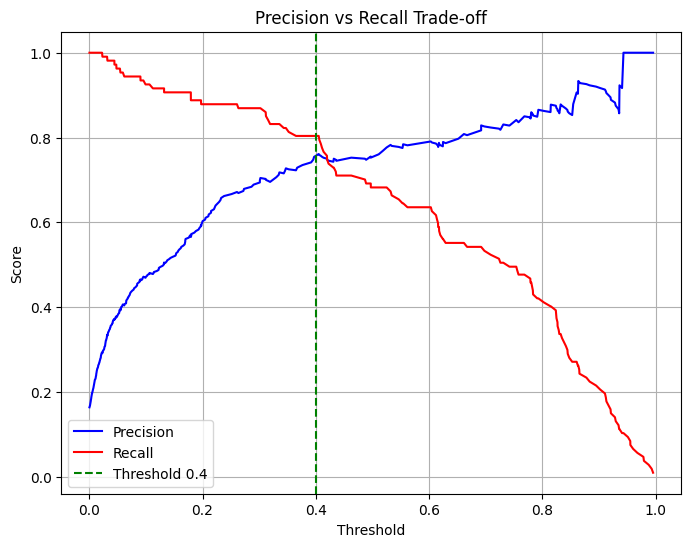

In [75]:
# Probabilitas prediksi dari model tuned
y_scores = best_model.predict_proba(X_test)[:, 1]

# Hitung precision, recall di berbagai threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="red")
plt.axvline(x=0.4, color="green", linestyle="--", label="Threshold 0.4")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall Trade-off")
plt.legend()
plt.grid(True)
plt.show()


saya menyesuaikan ambang batas (threshold) model agar lebih seimbang dalam mengenali pelanggan yang berpotensi churn. Dengan pengaturan ini, model kini mampu mendeteksi sekitar 80% pelanggan yang benar-benar akan churn, sekaligus tetap menjaga tingkat ketepatan prediksi yang cukup baik. Artinya, tim bisa lebih cepat mengambil tindakan pencegahan terhadap pelanggan berisiko, tanpa terlalu banyak salah sasaran.

“Dari grafik precision–recall, terlihat bahwa semakin rendah threshold maka recall meningkat, namun precision menurun. Pada threshold 0.4, model mampu mendeteksi sekitar 80% pelanggan yang churn (recall = 0.80), dengan tingkat ketepatan prediksi masih cukup tinggi (precision = 0.76).

Pemilihan threshold 0.4 dilakukan sebagai kompromi, karena tujuan utama bisnis adalah meminimalkan kehilangan pelanggan (meningkatkan recall), sambil tetap menjaga kualitas prediksi agar tim tidak terlalu banyak salah menargetkan pelanggan yang sebenarnya tidak churn.”

In [76]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]
y_pred_tuned = (y_pred_proba_tuned >= threshold).astype(int)


print("=== Classification Report Default Model ===")
print(classification_report(y_test, y_pred_default))
print("=== Classification Report Tuned Model ===")
print(classification_report(y_test, y_pred_tuned))

=== Classification Report Default Model ===
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       547
           1       0.72      0.75      0.73       107

    accuracy                           0.91       654
   macro avg       0.84      0.85      0.84       654
weighted avg       0.91      0.91      0.91       654

=== Classification Report Tuned Model ===
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       547
           1       0.76      0.80      0.78       107

    accuracy                           0.93       654
   macro avg       0.86      0.88      0.87       654
weighted avg       0.93      0.93      0.93       654



“Model default sudah cukup baik dengan ROC AUC X. Dan setelah tuning hyperparameter dan penyesuaian threshold, performa meningkat terutama pada recall churn (dari 75% → 80%). Hal ini menunjukkan model setelah tuning lebih efektif dalam mendeteksi pelanggan berisiko churn dengan precision 0.76 dan accuracy 0.93.”

Feature Importances

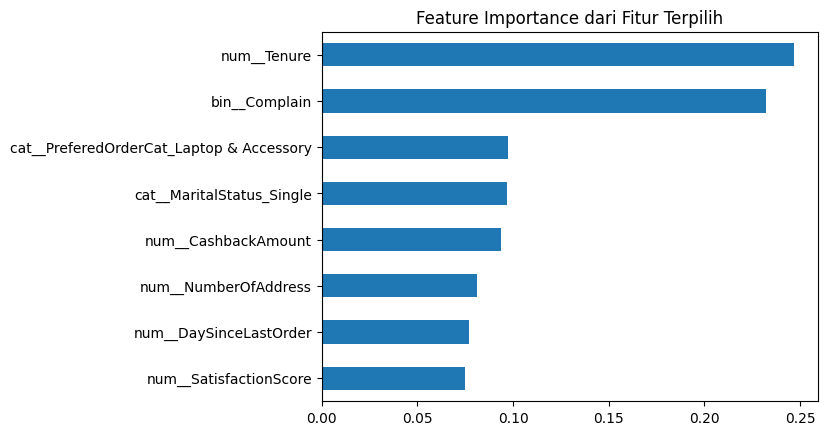

In [77]:
all_feature_names = preprocess_transformer.get_feature_names_out()
selected_features_mask = best_model.named_steps['rfe_xgb'].support_
selected_feature_names = all_feature_names[selected_features_mask]
feature_importances = best_model.named_steps['rfe_xgb'].estimator_.feature_importances_
coef1 = pd.Series(feature_importances, index=selected_feature_names)
coef1.sort_values().plot(kind="barh", title="Feature Importance dari Fitur Terpilih")
plt.show()

- Tenure ≈ 0.25 → kontribusi terbesar, artinya lama berlangganan pelanggan sangat menentukan churn.
- Complain ≈ 0.22 → juga sangat kuat, hampir sebanding dengan tenure.
- Fitur lain (0.07–0.10) → pengaruhnya masih ada, tapi relatif kecil dibanding dua faktor utama di atas.

Tenure (num__Tenure) menjadi faktor paling berpengaruh dalam menentukan churn. Artinya, semakin lama pelanggan bertahan, kecenderungan mereka untuk churn lebih rendah. Tenure rendah → risiko churn lebih tinggi.

Complain (bin__Complain) juga sangat penting. Pelanggan yang sering melakukan komplain memiliki kecenderungan churn yang lebih besar. Hal ini menegaskan pentingnya manajemen keluhan pelanggan.

Dari hasil feature importance, strategi perusahaan sebaiknya berfokus pada meningkatkan kepuasan pelanggan yang sering komplain dan memperpanjang masa bertahan pelanggan baru (misalnya dengan program loyalitas sejak awal).

# Conclusion & Recommendation

**Kesimpulan (Conclusion)**

Analisis dan pemodelan untuk prediksi customer churn ini telah berhasil dilakukan. Model XGBoost terpilih sebagai model terbaik setelah melalui proses perbandingan dan hyperparameter tuning. Dengan performa yang sangat baik (Recall Churn mencapai 80% dan Akurasi 93% setelah penyesuaian threshold), model ini mampu mengidentifikasi sebagian besar pelanggan yang berisiko churn tanpa terlalu banyak mengorbankan ketepatan.

Dari analisis feature importance, ditemukan bahwa faktor paling signifikan yang mempengaruhi churn adalah:

1. Tenure (lama berlangganan): Pelanggan baru memiliki risiko churn yang jauh lebih tinggi.

2. Complain (keluhan pelanggan): Pelanggan yang pernah mengajukan keluhan memiliki kecenderungan signifikan untuk churn.

Dengan demikian, model ini tidak hanya berfungsi sebagai alat prediksi, tetapi juga memberikan wawasan strategis tentang area mana yang perlu menjadi fokus utama perusahaan dalam upaya retensi pelanggan. Model ini siap untuk diimplementasikan ke dalam sistem operasional untuk membantu pengambilan keputusan bisnis yang proaktif.


**Rekomendasi (Recommendation)**


Berdasarkan kesimpulan di atas, berikut adalah rekomendasi yang dapat ditindaklanjuti oleh perusahaan:

1. Implementasikan Model Prediktif secara Operasional

  - Gunakan model ini untuk melakukan skoring risiko churn secara berkala (misalnya, mingguan atau bulanan) pada seluruh basis pelanggan.

  - Buat "daftar pantauan" (watchlist) yang berisi pelanggan dengan probabilitas churn tertinggi (misalnya, di atas threshold 0.4) untuk menjadi target utama program retensi.

2. Prioritaskan Penanganan Keluhan Pelanggan (Focus on Complain)

  - Karena Complain adalah prediktor churn terkuat kedua, tim customer service harus memberikan respons yang lebih cepat dan solusi yang memuaskan bagi setiap keluhan yang masuk.

  - Setelah keluhan terselesaikan, lakukan tindak lanjut proaktif kepada pelanggan tersebut untuk memastikan kepuasan mereka telah pulih. Pertimbangkan untuk memberikan kompensasi kecil sebagai bentuk itikad baik.

3. Buat Program Retensi Khusus untuk Pelanggan Baru (Focus on Tenure)

  - Mengingat Tenure rendah adalah prediktor churn nomor satu, rancang program onboarding dan loyalitas khusus untuk pelanggan dalam 1-3 bulan pertama.

  - Program ini bisa berupa penawaran eksklusif, panduan penggunaan produk, atau check-in personal dari tim customer success untuk memastikan pengalaman awal mereka positif.

4. Segmentasi Kampanye Pemasaran Berbasis Risiko

  - Bagi pelanggan yang masuk dalam "daftar pantauan", tawarkan promosi retensi yang proaktif, seperti diskon khusus, penawaran cashback yang lebih tinggi, atau akses awal ke produk baru.

  - Hindari mengirimkan penawaran retensi ini kepada pelanggan dengan risiko churn rendah untuk menjaga efisiensi biaya dan margin keuntungan.

5. Lakukan Monitoring dan Evaluasi Model Secara Berkala

  - Perilaku pelanggan dapat berubah seiring waktu. Disarankan untuk memantau performa model setiap kuartal dan melakukan retraining (pelatihan ulang) setidaknya setiap 6 bulan sekali menggunakan data terbaru untuk memastikan akurasi prediksi tetap terjaga.